In [1]:
# Univariate LSTM examples
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [2]:
# define input sequence
timeseries_data = [110,125,133,146,158,172,187,196,210]
# choose a number of time steps
n_steps = 3
# split into samples
#X,y = prepare_data(timeseries_data,n_features)

In [3]:
# preparing independent and dependent features
def prepare_data(timeseries_data,n_steps):
    X,y = [],[]
    for i in range(len(timeseries_data)):
        # find the end of this pattern
        end_ix = i + n_steps
        # cheak if we are bayond the sequence
        if end_ix >len(timeseries_data)-1:
            break
        # gather input and output parts of the pattern 
        seq_x,seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X),np.array(y)

In [4]:
# split into samples
X,y = prepare_data(timeseries_data,n_steps)

In [5]:
X,y

(array([[110, 125, 133],
        [125, 133, 146],
        [133, 146, 158],
        [146, 158, 172],
        [158, 172, 187],
        [172, 187, 196]]),
 array([146, 158, 172, 187, 196, 210]))

In [6]:
X.shape

(6, 3)

In [7]:
y.shape

(6,)

In [8]:
#reshape from [samples,timesteps]  into [samples, timesteps , features]
n_features = 1
X = X.reshape((X.shape[0],X.shape[1],n_features))

In [9]:
X.shape

(6, 3, 1)

In [18]:
# Building LSTM Model 

model = Sequential()
model.add(LSTM(50,activation = 'relu',return_sequences = True, input_shape =(n_steps,n_features)))
model.add(LSTM(50,activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')
# fit model 
model.fit(X,y,epochs = 300, verbose = 0)

In [19]:
# model save

In [20]:
# Demonstrate prediction for next 10 days
x_input = np.array([187,196,210])
temp_input = list(x_input)
lst_output = []
i=0
while(i<10):
    
    if(len(temp_input)>3):
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        # print(x_input)
        x_input = x_input.reshape((1,n_steps,n_features))
        # print(x_input)
        yhat = model.predict(x_input,verbose=0)
        print("{} day output {} ".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input = temp_input[1:]
        # Print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1,n_steps,n_features))
        yhat = model.predict(x_input , verbose = 0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1

print(lst_output)

[224.38495]
1 day input [196.         210.         224.38494873]
1 day output [[236.33838]] 
2 day input [210.         224.38494873 236.33837891]
2 day output [[250.74922]] 
3 day input [224.38495 236.33838 250.74922]
3 day output [[264.9969]] 
4 day input [236.33838 250.74922 264.9969 ]
4 day output [[278.91434]] 
5 day input [250.74922 264.9969  278.91434]
5 day output [[294.15176]] 
6 day input [264.9969  278.91434 294.15176]
6 day output [[309.48138]] 
7 day input [278.91434 294.15176 309.48138]
7 day output [[325.2047]] 
8 day input [294.15176 309.48138 325.2047 ]
8 day output [[341.833]] 
9 day input [309.48138 325.2047  341.833  ]
9 day output [[358.8625]] 
[224.38495, 236.33838, 250.74922, 264.9969, 278.91434, 294.15176, 309.48138, 325.2047, 341.833, 358.8625]


In [22]:
# Visualizing The Output
import matplotlib.pyplot as plt

In [25]:
day_new = np.arange(1,10)
day_pred = np.arange(10,20)


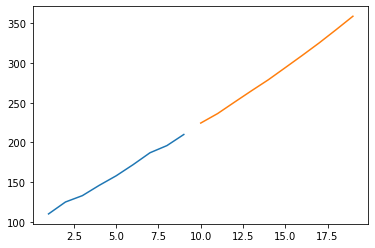

In [26]:
plt.plot(day_new,timeseries_data)
plt.plot(day_pred,lst_output)